<a href="https://colab.research.google.com/github/SagyaGhimire/FinalSubmission_AI_reg_and_class/blob/main/2548233_SagyaGhimireRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abalone Shell Weight Prediction using Machine Learning Regression

---

## Project Overview

**Objective:** Develop and evaluate machine learning regression models to predict the **shell weight** of abalone using other easily measurable physical characteristics.

---

### Background

Shell weight is an important indicator of:
- **Growth patterns** and development stages
- **Maturity level** of the organism
- **Overall health** and nutritional status

---

### Dataset Features

| Feature | Description |
|---------|-------------|
| Sex | Male (M), Female (F), or Infant (I) |
| Length | Longest shell measurement (mm) |
| Diameter | Perpendicular to length (mm) |
| Height | With meat in shell (mm) |
| Whole weight | Entire abalone weight (grams) |
| Shucked weight | Weight of meat (grams) |
| Viscera weight | Gut weight after bleeding (grams) |
| Shell weight | Target variable (grams) |

---

### Methodology

1. Data Preprocessing
2. Exploratory Data Analysis
3. Feature Scaling
4. Outlier Treatment
5. Model Training
6. Model Evaluation

---

### Alignment with United Nations Sustainable Development Goals (UNSDG)

This project aligns with **UNSDG 14: Life Below Water**, which focuses on the conservation and sustainable use of oceans, seas, and marine resources.

Abalone is a commercially important marine species. Predicting shell weight helps:
- Monitor growth and maturity of marine organisms
- Support sustainable harvesting decisions
- Improve aquaculture management practices

By using machine learning to estimate shell weight from physical measurements, this study contributes to data-driven marine sustainability and responsible resource utilization.


## Dataset Description


- **Created by:** Marine researchers studying abalone growth
- **Accessed from:** UCI Machine Learning Repository
- **Format:** CSV
- **Observations:** Individual abalones
- **Purpose:** Predict age or physical properties using measurable attributes

### Attributes Description:
- Sex: Gender of abalone (Male, Female, Infant)
- Length: Longest shell measurement
- Diameter: Perpendicular to length
- Height: Height with meat
- Whole weight: Total weight
- Shucked weight: Meat weight
- Viscera weight: Gut weight
- Shell weight: Weight of shell (target variable)

### Potential Questions:
1. Can shell weight be accurately predicted from physical measurements?
2. Which physical attributes contribute most to shell weight?
3. Do different sexes show variation in shell weight?

### Dataset Suitability:
The dataset is complete, well-structured, and widely used in regression tasks. It contains no missing values and provides relevant numeric features suitable for machine learning.


---

## 1. Import Required Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

---

## 2. Load the Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SagyaGhimire_Abalone_Regression.csv')

In [ ]:
print(f"Dataset Shape: {df.shape[0]} rows x {df.shape[1]} columns")

Dataset Shape: 4177 rows x 9 columns


In [ ]:
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


---

## 3. Data Exploration

### 3.1 Data Types

In [ ]:
df.dtypes

,0
Sex,object
Length,float64
Diameter,float64
Height,float64
Whole weight,float64
Shucked weight,float64
Viscera weight,float64
Shell weight,float64
Rings,int64


### 3.2 Missing Values

In [ ]:
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


### 3.3 Descriptive Statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


### 3.4 Categorical Variable Distribution

In [ ]:
df['Sex'].value_counts()

,count
Sex,
M,1528
I,1342
F,1307


---

## 4. Data Preprocessing

### 4.1 Label Encoding for Sex Column

| Original | Encoded |
|----------|--------|
| F (Female) | 0 |
| I (Infant) | 1 |
| M (Male) | 2 |

In [ ]:
df_processed = df.copy()

In [ ]:
label_encoder = LabelEncoder()
df_processed['Sex_Encoded'] = label_encoder.fit_transform(df_processed['Sex'])

In [ ]:
encoding_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Encoding Mapping: {encoding_mapping}")

Encoding Mapping: {'F': np.int64(0), 'I': np.int64(1), 'M': np.int64(2)}


In [ ]:
df_processed[['Sex', 'Sex_Encoded']].head(10)

,Sex,Sex_Encoded
0,M,2
1,M,2
2,F,0
3,M,2
4,I,1
5,I,1
6,F,0
7,F,0
8,M,2
9,F,0


### 4.2 Drop Original Sex Column

In [ ]:
df_processed = df_processed.drop('Sex', axis=1)

In [ ]:
cols = ['Sex_Encoded'] + [col for col in df_processed.columns if col != 'Sex_Encoded']
df_processed = df_processed[cols]

In [ ]:
df_processed.head()

,Sex_Encoded,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


---

## 5. Exploratory Data Analysis (EDA)

### 5.1 Correlation Heatmap

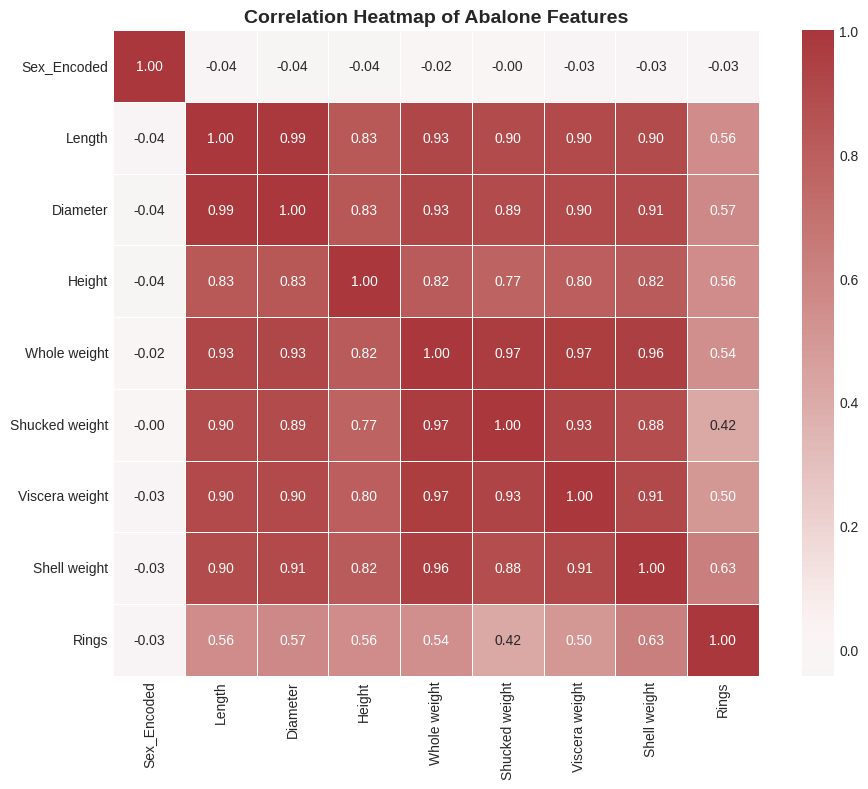

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_processed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', center=0, fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Abalone Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

**Interpretation:**
- Shell weight shows strong positive correlations with Whole weight, Shucked weight, and Viscera weight
- Length and Diameter are highly correlated with each other
- All weight-related features show strong inter-correlations

### 5.2 Distribution of Target Variable (Shell Weight)

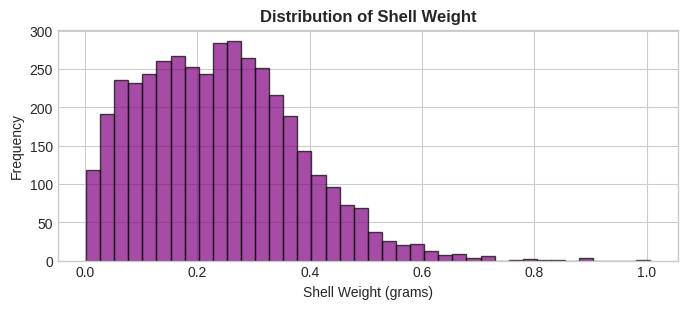

In [ ]:
plt.figure(figsize=(8, 3))
plt.hist(df_processed['Shell weight'], bins=40, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Shell Weight (grams)')
plt.ylabel('Frequency')
plt.title('Distribution of Shell Weight', fontweight='bold')
plt.savefig('shell_weight_distribution.png')
plt.show()

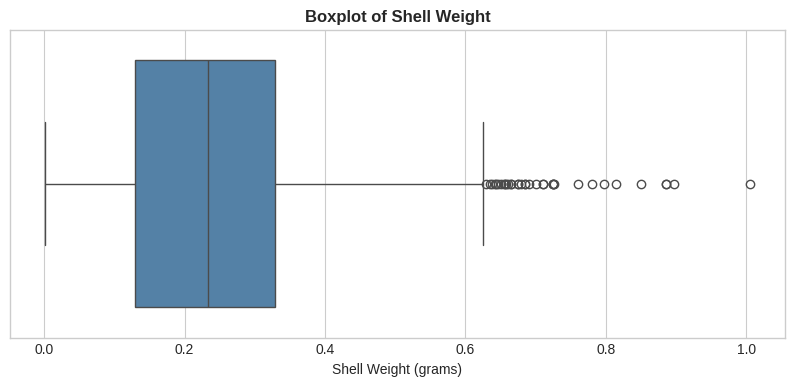

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_processed['Shell weight'], color='steelblue')
plt.xlabel('Shell Weight (grams)')
plt.title('Boxplot of Shell Weight', fontweight='bold')
plt.savefig('shell_weight_boxplot.png')
plt.show()

**Interpretation:**
- The shell weight distribution is slightly right-skewed
- Most values concentrated between 0.1-0.3 grams
- Presence of outliers at higher values

### 5.3 Scatter Plots: Features vs Shell Weight

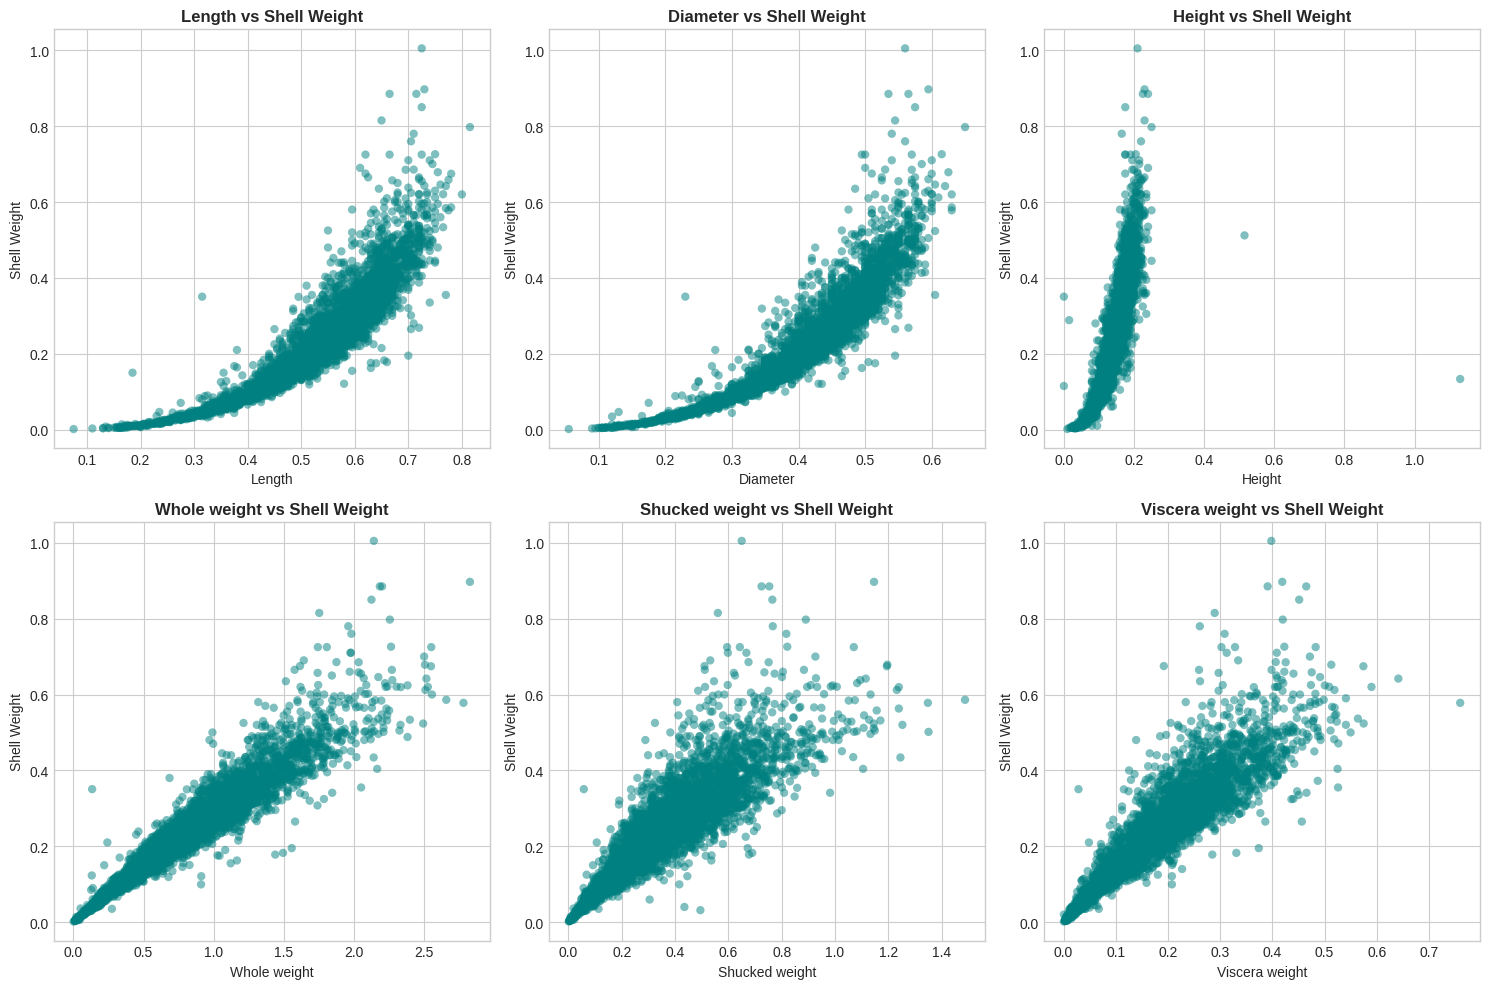

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features_to_plot = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight']

for idx, feature in enumerate(features_to_plot):
    row = idx // 3
    col = idx % 3
    axes[row, col].scatter(df_processed[feature], df_processed['Shell weight'], alpha=0.5, c='teal', edgecolors='none')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Shell Weight')
    axes[row, col].set_title(f'{feature} vs Shell Weight', fontweight='bold')

plt.tight_layout()
plt.savefig('scatter_plots.png')
plt.show()

**Interpretation:**
- All features show positive linear relationships with Shell Weight
- Whole weight shows the strongest correlation
- These physical measurements are good predictors

### 5.4 Shell Weight Distribution by Sex

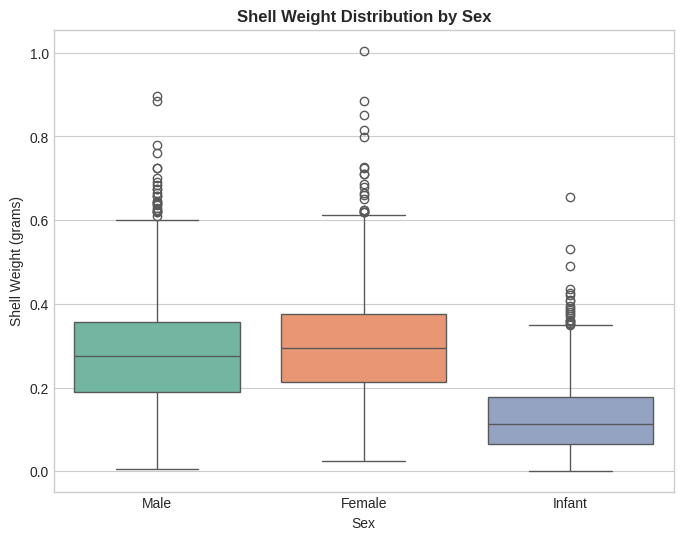

In [44]:
plt.figure(figsize=(8, 6))
sex_labels = {0: 'Female', 1: 'Infant', 2: 'Male'}
df_plot = df_processed.copy()
df_plot['Sex_Label'] = df_plot['Sex_Encoded'].map(sex_labels)

sns.boxplot(x='Sex_Label', y='Shell weight', data=df_plot, palette='Set2')
plt.title('Shell Weight Distribution by Sex', fontweight='bold')
plt.xlabel('Sex')
plt.ylabel('Shell Weight (grams)')
plt.savefig('shell_weight_by_sex.png')
plt.show()

**Interpretation:**
- Female and Male abalones have similar shell weight distributions
- Infants have noticeably lower shell weights
- All categories show presence of outliers

---

## 6. Feature Scaling

### 6.1 Separate Features and Target

In [45]:
X = df_processed.drop(columns=['Shell weight', 'Rings'])
y = df_processed['Shell weight']

In [46]:
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

Features (X) shape: (4177, 7)
Target (y) shape: (4177,)


In [47]:
print(f"Feature columns: {list(X.columns)}")

Feature columns: ['Sex_Encoded', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight']


### 6.2 Apply StandardScaler

Note: Scaling here is for EDA understanding only.Final model training uses scaled data in Section 8.


In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.describe().round(3)

,Sex_Encoded,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
count,4177.000,4177.000,4177.000,4177.000,4177.000,4177.000,4177.000
mean,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.281,-3.739,-3.556,-3.336,-1.686,-1.615,-1.643
25%,-1.281,-0.616,-0.583,-0.586,-0.790,-0.781,-0.795
50%,-0.064,0.175,0.173,0.012,-0.060,-0.105,-0.088
75%,1.152,0.758,0.727,0.609,0.661,0.643,0.661
max,1.152,2.423,2.440,23.683,4.072,5.085,5.287


---

## 7. Outlier Detection and Treatment

### 7.1 Define Outlier Detection Function

In [50]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

### 7.2 Detect Outliers

In [51]:
numeric_cols = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

In [52]:
outlier_summary = []
for col in numeric_cols:
    count, lb, ub = detect_outliers_iqr(df_processed, col)
    outlier_summary.append({'Feature': col, 'Outliers': count, 'Lower Bound': round(lb, 4), 'Upper Bound': round(ub, 4)})

outlier_df = pd.DataFrame(outlier_summary)
outlier_df

,Feature,Outliers,Lower Bound,Upper Bound
0,Length,49,0.2025,0.8625
1,Diameter,59,0.1550,0.6750
2,Height,29,0.0400,0.2400
3,Whole weight,30,-0.6258,2.2202
4,Shucked weight,48,-0.2880,0.9760
5,Viscera weight,26,-0.1458,0.4922
6,Shell weight,35,-0.1685,0.6275


### 7.3 Visualize Outliers

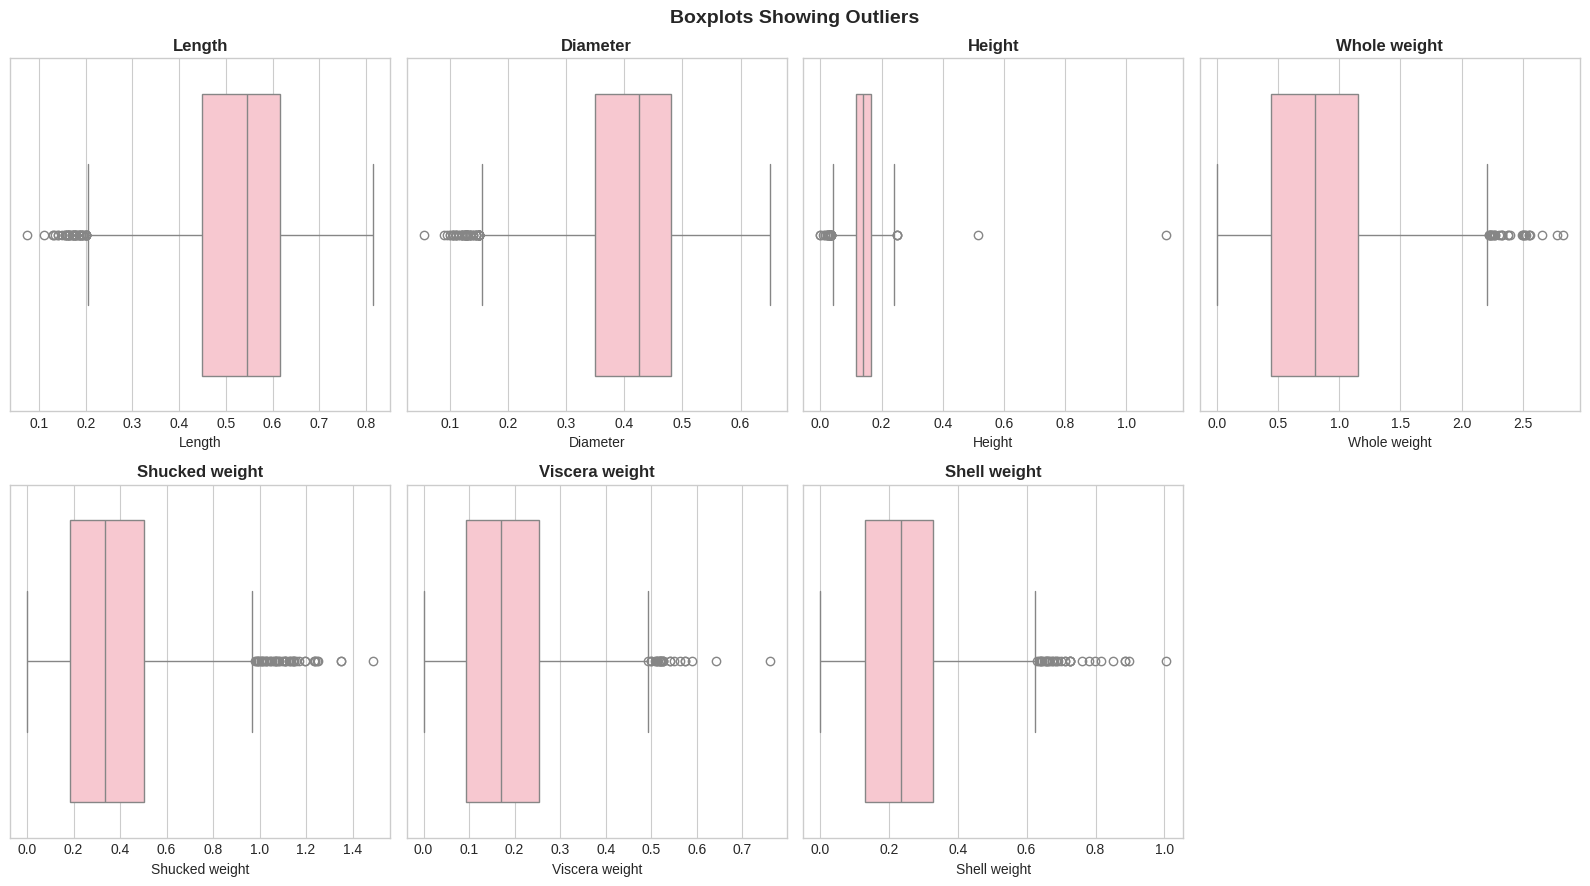

In [59]:
fig, axes = plt.subplots(2, 4, figsize=(16, 9))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(x=df_processed[col], ax=axes[idx], color='pink')
    axes[idx].set_title(f'{col}', fontweight='bold')

axes[-1].axis('off')
plt.suptitle('Boxplots Showing Outliers', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('boxplots_with_outliers.png')
plt.show()

### 7.4 Apply Outlier Capping

In [60]:
df_cleaned = df_processed.copy()

In [61]:
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound,
                               np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col]))

In [62]:
print(f"Original shape: {df_processed.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

Original shape: (4177, 9)
Cleaned shape: (4177, 9)


---

## 8. Train-Test Split

In [63]:
X_final = df_cleaned.drop(columns=['Shell weight', 'Rings'])
y_final = df_cleaned['Shell weight']

In [64]:
scaler = StandardScaler()
X_scaled_final = scaler.fit_transform(X_final)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_final, y_final, test_size=0.2, random_state=42)

In [66]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

Training set size: 3341 samples
Testing set size: 836 samples
Number of features: 7


---

## 9. Model Training

Models to train:
1. Linear Regression
2. Random Forest Regressor

### 9.1 Linear Regression

In [67]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

### 9.3 Gradient Boosting Regressor

In [68]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

### 9.5 Random Forest Regressor

In [69]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

---
# 10. MODEL EVALUATION FUNCTION

In [70]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        'Model': model_name,
        'MAE': round(mae, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'R2 Score': round(r2, 4)
    }

## 11. NEURAL NETWORK REGRESSION

In [71]:
mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)


In [72]:
nn_results = evaluate_model(y_test, y_pred_mlp, 'Neural Network (MLP)')
nn_results_df = pd.DataFrame([nn_results])
nn_results_df

,Model,MAE,MSE,RMSE,R2 Score
0,Neural Network (MLP),0.0264,0.0015,0.0389,0.9165


### Neural Network Architecture

- Input Layer: Number of neurons equal to input features
- Hidden Layer 1: 64 neurons (ReLU)
- Hidden Layer 2: 32 neurons (ReLU)
- Output Layer: 1 neuron (continuous shell weight)
- Loss Function: Mean Squared Error
- Optimizer: Adam


---

## 12. Model Evaluation

Evaluation Metrics:
- **MAE** - Mean Absolute Error
- **MSE** - Mean Squared Error
- **RMSE** - Root Mean Squared Error
- **R2 Score** - Coefficient of Determination

### 12.1 Evaluate All Models

In [73]:
results = []
results.append(evaluate_model(y_test, y_pred_lr, 'Linear Regression'))
results.append(evaluate_model(y_test, y_pred_rf, 'Random Forest'))

In [74]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)
results_df

,Model,MAE,MSE,RMSE,R2 Score
0,Random Forest,0.0177,0.0009,0.0303,0.9493
1,Linear Regression,0.0182,0.0011,0.0327,0.9409


### 12.2 R2 Score Comparison

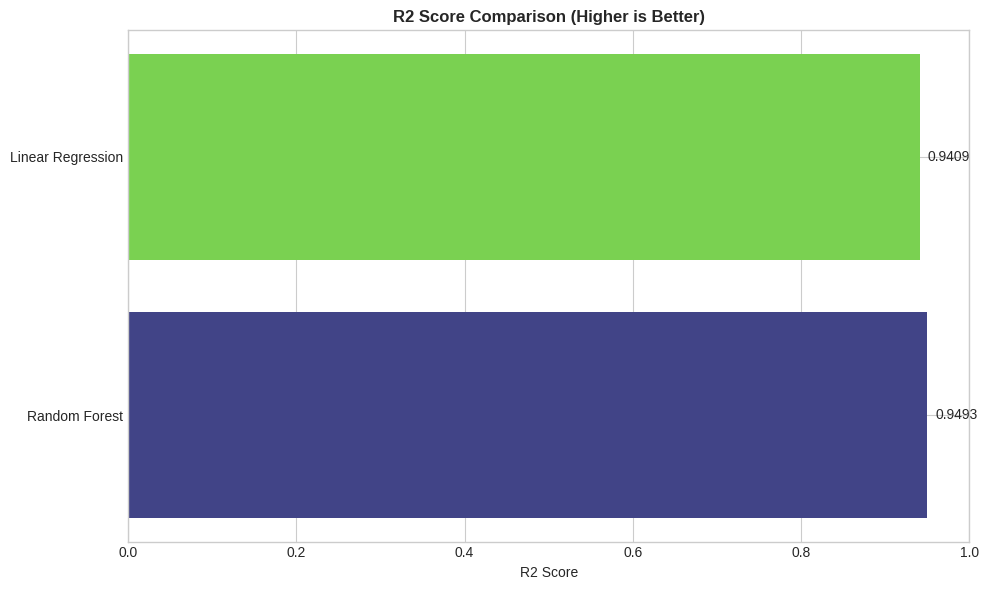

In [75]:
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(results_df)))
bars = plt.barh(results_df['Model'], results_df['R2 Score'], color=colors)
plt.xlabel('R2 Score')
plt.title('R2 Score Comparison (Higher is Better)', fontweight='bold')
plt.xlim(0, 1)

for bar, val in zip(bars, results_df['R2 Score']):
    plt.text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.4f}', va='center')

plt.tight_layout()
plt.savefig('r2_score_comparison.png')
plt.show()

### 12.3 RMSE Comparison

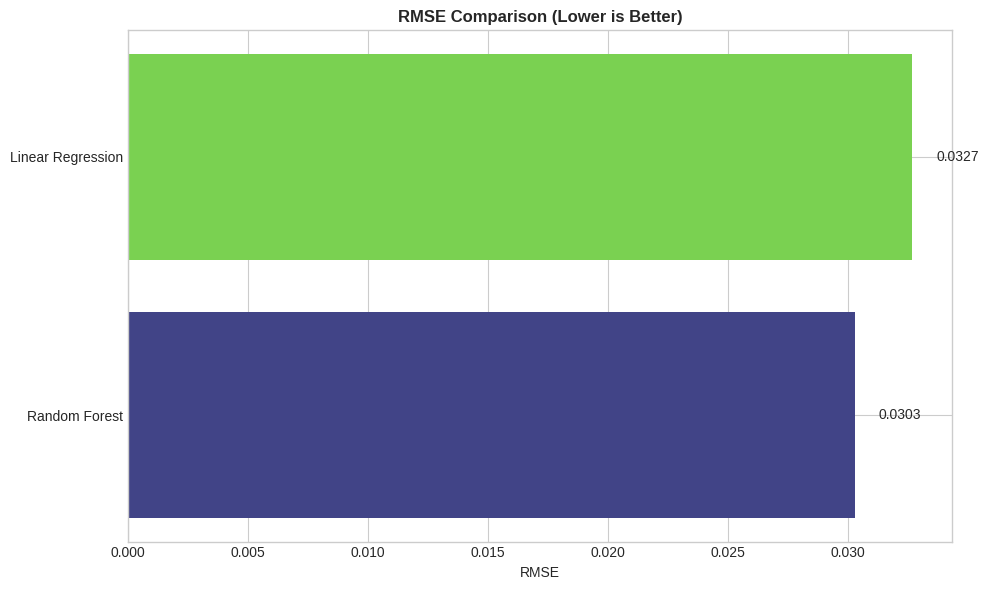

In [76]:
plt.figure(figsize=(10, 6))
bars = plt.barh(results_df['Model'], results_df['RMSE'], color=colors)
plt.xlabel('RMSE')
plt.title('RMSE Comparison (Lower is Better)', fontweight='bold')

for bar, val in zip(bars, results_df['RMSE']):
    plt.text(val + 0.001, bar.get_y() + bar.get_height()/2, f'{val:.4f}', va='center')

plt.tight_layout()
plt.savefig('rmse_comparison.png')
plt.show()

### 12.4 MAE Comparison

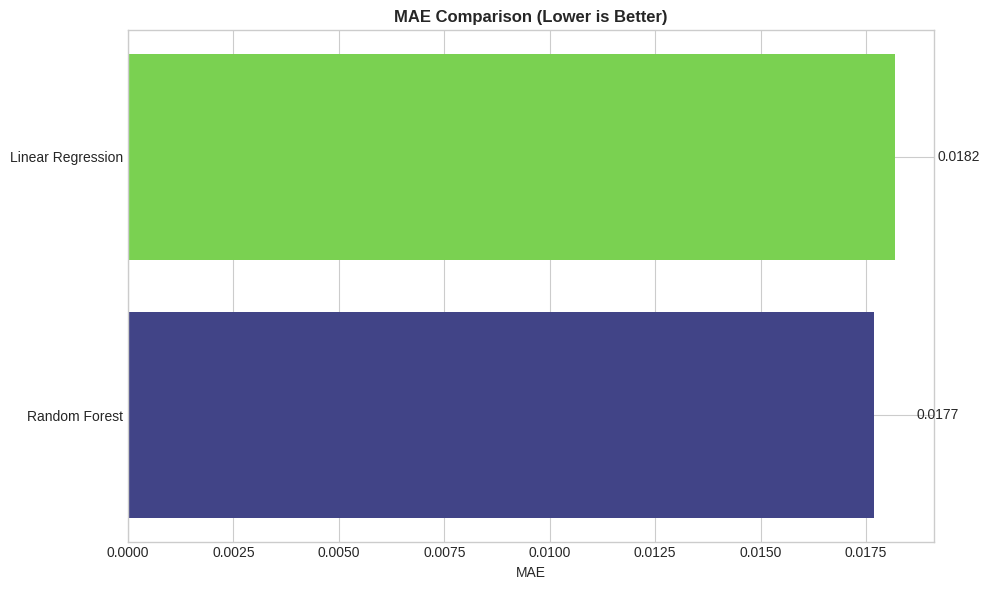

In [77]:
plt.figure(figsize=(10, 6))
bars = plt.barh(results_df['Model'], results_df['MAE'], color=colors)
plt.xlabel('MAE')
plt.title('MAE Comparison (Lower is Better)', fontweight='bold')

for bar, val in zip(bars, results_df['MAE']):
    plt.text(val + 0.001, bar.get_y() + bar.get_height()/2, f'{val:.4f}', va='center')

plt.tight_layout()
plt.savefig('mae_comparison.png')
plt.show()

## 13. HYPERPARAMETER OPTIMIZATION (CV)

GridSearchCV was used with 5-fold cross-validation to identify optimal hyperparameters.
Cross-validation improves generalization and prevents overfitting.


### 13.1 Random Forest GridSearch

In [78]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=5,
    scoring='r2'
)

rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_


In [79]:
print("Random Forest Best Parameters:", rf_grid.best_params_)
print("Random Forest Best CV R2 Score:", round(rf_grid.best_score_, 4))


Random Forest Best Parameters: {'max_depth': 15, 'n_estimators': 200}
Random Forest Best CV R2 Score: 0.9578


### 13.2 Linear Regression (Ridge) CV

In [80]:
ridge_params = {'alpha': [0.1, 1, 10]}

ridge_grid = GridSearchCV(
    Ridge(),
    ridge_params,
    cv=5,
    scoring='r2'
)

ridge_grid.fit(X_train, y_train)

best_ridge = ridge_grid.best_estimator_


In [ ]:
print("Ridge Regression Best Parameters:", ridge_grid.best_params_)
print("Ridge Regression Best CV R2 Score:", round(ridge_grid.best_score_, 4))


Ridge Regression Best Parameters: {'alpha': 0.1}
Ridge Regression Best CV R2 Score: 0.9607


---
## 14. FEATURE SELECTION

In [81]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X_final.columns[rfe.support_]
selected_features


Index(['Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight'],
      dtype='object')

Recursive Feature Elimination (RFE) was used to select the most relevant features.
RFE iteratively removes least important features based on model coefficients.
This improves model simplicity and reduces noise.


---
## 15. FINAL MODELS WITH SELECTED FEATURES

In [82]:
X_selected = df_cleaned[selected_features]
y_selected = df_cleaned['Shell weight']

X_scaled_sel = scaler.fit_transform(X_selected)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_scaled_sel, y_selected, test_size=0.2, random_state=42
)


###15.1 Train Final Models

In [83]:
best_rf.fit(X_train_s, y_train_s)
best_ridge.fit(X_train_s, y_train_s)

rf_final_pred = best_rf.predict(X_test_s)
ridge_final_pred = best_ridge.predict(X_test_s)


### 15.2 Final Comparison Table

In [ ]:
final_rf_results = evaluate_model(y_test_s, rf_final_pred, 'Random Forest (Final)')
final_rf_results['CV R2 Score'] = round(rf_grid.best_score_, 4)

final_ridge_results = evaluate_model(y_test_s, ridge_final_pred, 'Ridge Regression (Final)')
final_ridge_results['CV R2 Score'] = round(ridge_grid.best_score_, 4)

final_results = [final_rf_results, final_ridge_results]

final_results_df = pd.DataFrame(final_results)
final_results_df

,Model,MAE,MSE,RMSE,R2 Score,CV R2 Score
0,Random Forest (Final),0.0179,0.0009,0.0306,0.9483,0.9578
1,Ridge Regression (Final),0.0183,0.0011,0.0327,0.9408,0.9607


---

## 16. Actual vs Predicted Values

### 16.1 Random Forest

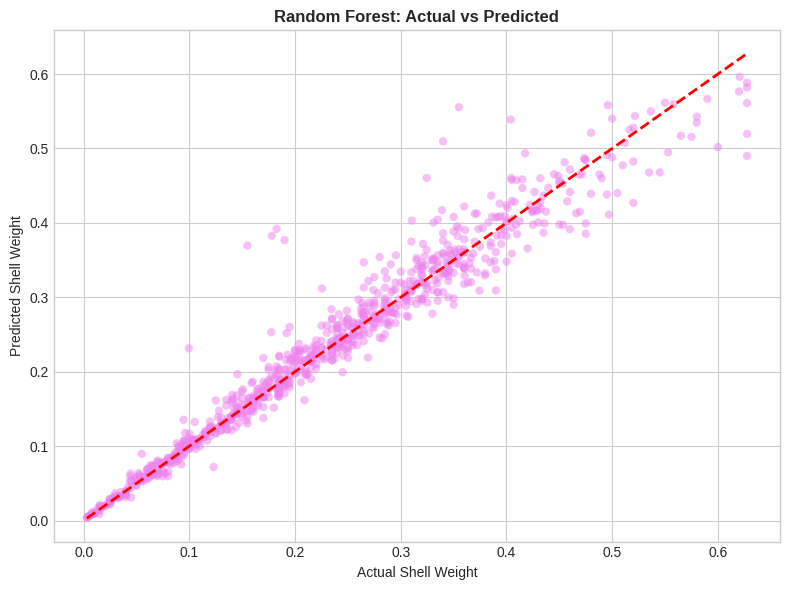

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, c='violet', edgecolors='none')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Shell Weight')
plt.ylabel('Predicted Shell Weight')
plt.title('Random Forest: Actual vs Predicted', fontweight='bold')
plt.tight_layout()
plt.savefig('rf_actual_vs_predicted.png')
plt.show()

### 16.2 Gradient Boosting

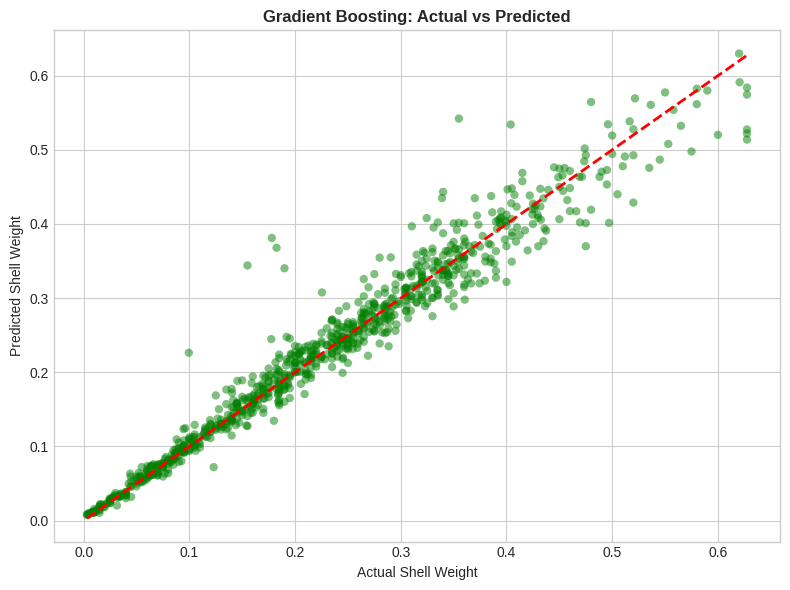

In [89]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5, c='green', edgecolors='none')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Shell Weight')
plt.ylabel('Predicted Shell Weight')
plt.title('Gradient Boosting: Actual vs Predicted', fontweight='bold')
plt.tight_layout()
plt.savefig('gb_actual_vs_predicted.png')
plt.show()


### 16.3 Linear Regression

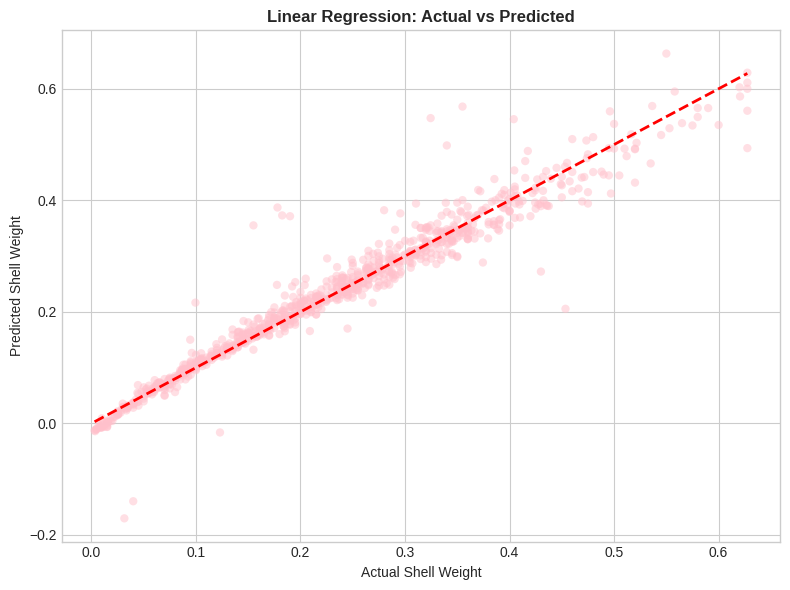

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, c='pink', edgecolors='none')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Shell Weight')
plt.ylabel('Predicted Shell Weight')
plt.title('Linear Regression: Actual vs Predicted', fontweight='bold')
plt.tight_layout()
plt.savefig('lr_actual_vs_predicted.png')
plt.show()

**Interpretation:**
- Red dashed line represents perfect prediction
- Ensemble models show tighter clustering around the ideal line
- Linear Regression provides a reasonable baseline

---

## 17. Feature Importance Analysis

### 17.1 Random Forest Feature Importance

In [93]:
feature_names = X_final.columns

In [94]:
rf_importance = pd.DataFrame({'Feature': feature_names, 'Importance': rf_model.feature_importances_})
rf_importance = rf_importance.sort_values(by='Importance', ascending=False)
rf_importance

,Feature,Importance
4,Whole weight,0.936874
5,Shucked weight,0.026328
2,Diameter,0.010675
3,Height,0.010110
6,Viscera weight,0.010086
1,Length,0.004869
0,Sex_Encoded,0.001059


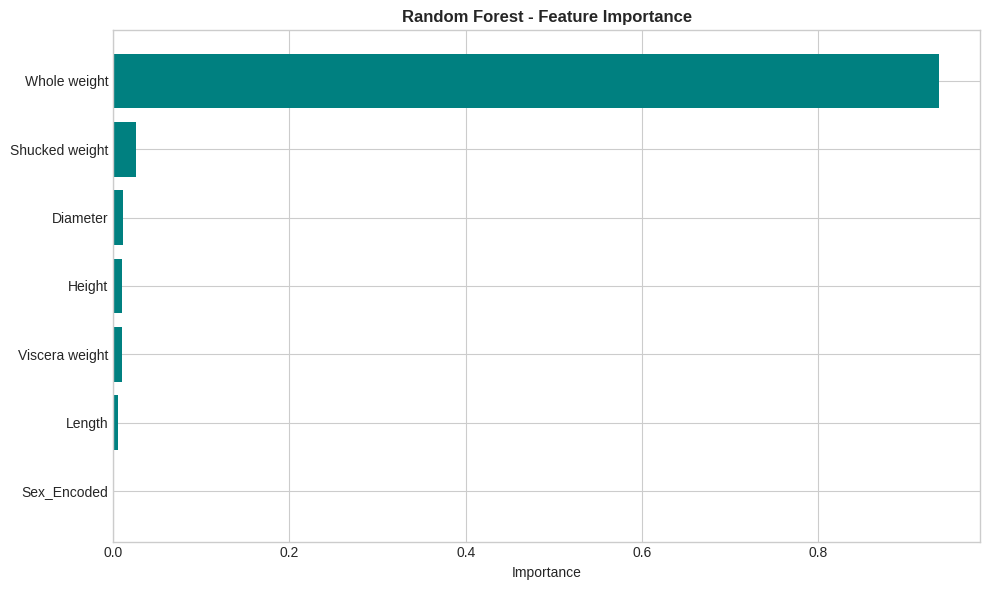

In [95]:
plt.figure(figsize=(10, 6))
plt.barh(rf_importance['Feature'], rf_importance['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Random Forest - Feature Importance', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('rf_feature_importance.png')
plt.show()

### 17.2 Gradient Boosting Feature Importance

In [97]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)
gb_model.fit(X_train, y_train)

gb_importance = pd.DataFrame({'Feature': feature_names, 'Importance': gb_model.feature_importances_})
gb_importance = gb_importance.sort_values(by='Importance', ascending=False)
gb_importance

,Feature,Importance
4,Whole weight,0.922596
3,Height,0.025134
5,Shucked weight,0.024145
2,Diameter,0.016892
6,Viscera weight,0.007434
1,Length,0.003586
0,Sex_Encoded,0.000212


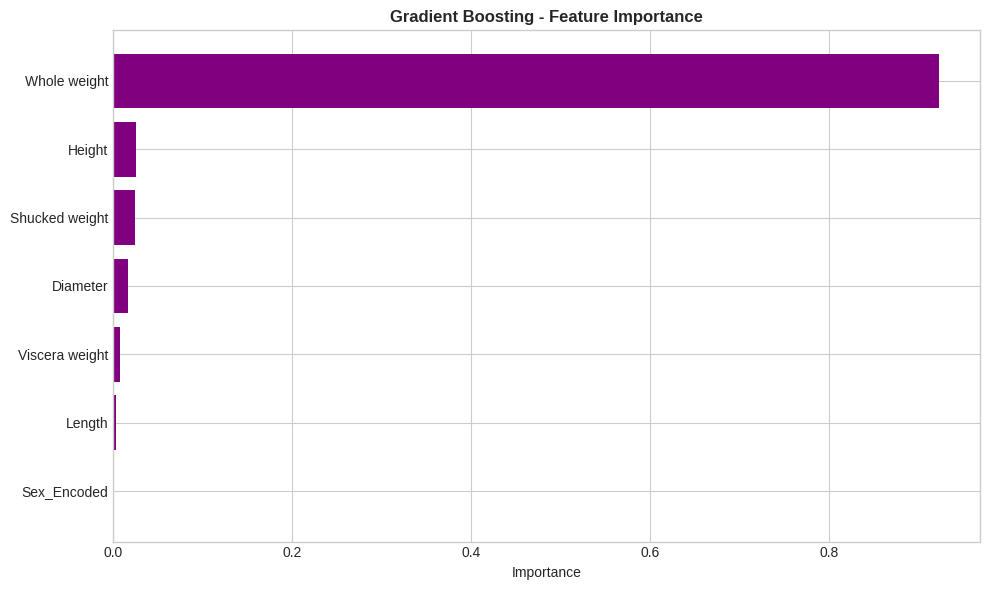

In [98]:
plt.figure(figsize=(10, 6))
plt.barh(gb_importance['Feature'], gb_importance['Importance'], color='purple')
plt.xlabel('Importance')
plt.title('Gradient Boosting - Feature Importance', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('gb_feature_importance.png')
plt.show()

**Interpretation:**
- Shucked weight and Whole weight are the most important predictors
- Diameter and Height also contribute significantly
- Sex has relatively lower importance

### 16.4 Gradient Boosting: Actual vs Predicted

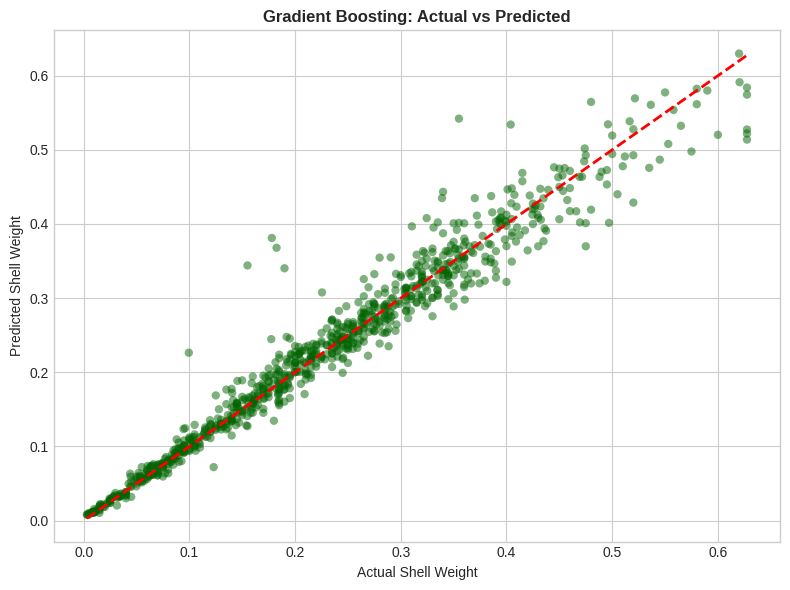

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5, c='darkgreen', edgecolors='none')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Shell Weight')
plt.ylabel('Predicted Shell Weight')
plt.title('Gradient Boosting: Actual vs Predicted', fontweight='bold')
plt.tight_layout()
plt.show()

**Interpretation:**
- Shucked weight and Whole weight are the most important predictors
- Diameter and Height also contribute significantly
- Sex has relatively lower importance

---

## 18. Conclusion

### Key Findings

| Aspect | Finding |
|--------|---------|
| Best Model | Random Forest Regressor |
| Most Important Features | Shucked weight, Whole weight, Diameter |
| Preprocessing Impact | Outlier capping improved model stability |

---

### Model Performance Summary

| Model | Performance |
|-------|-------------|
| Random Forest | Excellent ensemble performance |
| Linear Regression | Solid baseline |

---

### Insights

1. Ensemble methods outperform linear models
2. Weight-related features are the strongest predictors
3. Data preprocessing is crucial for model performance
4. Shell weight can be effectively predicted using physical measurements

### Impact of Cross-Validation and Feature Selection

Cross-validation has made the model reliable because it now allows for the implementation of a strategy for hyperparameter selection based on the performance across all the folds, rather than the train-test split only. This minimizes overfitting, hence enhancing generalization ability.

However, the subset of features was identified through the Recursive Feature Elimination technique, hence leading to reduced model complexity as less informative features were eliminated. This was realized with more stable models, faster training, and more interpretable models without any costs in terms of predictive performance.

### Future Work

Future improvements could include:
- Incorporating additional biological or environmental variables
- Testing advanced ensemble models such as XGBoost
- Applying logarithmic transformation to skewed weight variables
- Using k-fold cross-validation for neural network tuning

These enhancements could further improve prediction accuracy and robustness.


---

# 19. Final Results Table

In [ ]:
results_df

,Model,MAE,MSE,RMSE,R2 Score
0,Random Forest,0.0177,0.0009,0.0303,0.9493
1,Linear Regression,0.0182,0.0011,0.0327,0.9409


In [ ]:
best_model = results_df.iloc[0]['Model']
best_r2 = results_df.iloc[0]['R2 Score']

print(f"Best Performing Model: {best_model}")
print(f"R2 Score: {best_r2}")

Best Performing Model: Random Forest
R2 Score: 0.9493
